# Course Introduction and Review

Imports required in the folowing

In [2]:
import os

import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%matplotlib inline
%qtconsole

## Outline

* What is a regression model?

* Descriptive statistics -- numerical

* Descriptive statistics -- graphical

* Inference about a population mean
  
* Difference between two population means

# What is course about?


* It is a course on applied statistics.

* Hands-on: I use [Python](https://www.python.org/), as on open-source programming language having a lot of statistic packages.

* Course notes will be [jupyter](http://jupyter.org) notebooks.

* We will start out with a review of introductory statistics to see `Python` in action.
 
* Main topic is *(linear) regression models*: these are the *bread and butter* of applied statistics.

## What is a regression model? 

A regression model is a model of the relationships between some 
*covariates (predictors)* and an *outcome*.

Specifically, regression is a model of the *average* outcome *given or having fixed* the [covariates](https://en.wikipedia.org/wiki/Covariate). 

# Heights of mothers and daughters
  
* Heights of mothers and daughters collected by Karl Pearson in the late 19th century.

* One of our goals is to understand height of the daughter, `D`, knowing the height of the
mother, `M`.

* A mathematical  model might look like
  $$
  D = f(M) + \varepsilon$$
  where $f$ gives the average height of the daughter
  of a mother of height `M` and
  $\varepsilon$ is *error*: not *every* daughter has the same height.

* A statistical question: is there *any*
relationship between covariates (height of mothers) and outcomes (height of daughters) -- is $f$ just a constant?

Let's create a plot of the heights of the mother/daughter pairs. The data was scraped from alr3 R package and saved as `01_heights.csv` in the data folder accompanying this notebook.

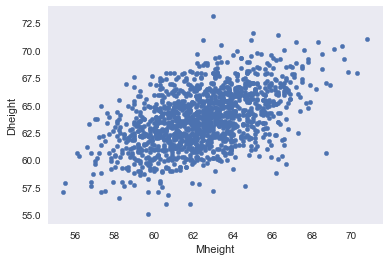

In [4]:
fpath=os.path.join(os.getcwd(),r'data/01_heights.csv')
df=pd.DataFrame.from_csv(fpath)
df.plot.scatter(x='Mheight',y='Dheight')

In the first part of this course we'll talk about fitting a line to this data. Let's do that and remake the plot, including this "best fitting line".

In [5]:
results = smf.ols('Dheight ~ Mheight',data=df).fit()
#results.params.Intercept
#results.params.Mheight

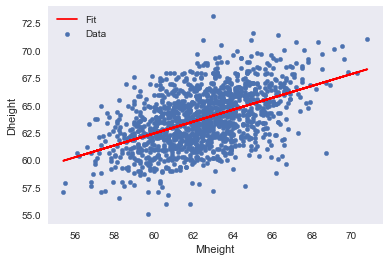

In [6]:
fig, ax = plt.subplots()
df.plot.scatter(x='Mheight',y='Dheight',ax=ax,label='Data')
ax.plot(df.Mheight, df.Mheight*results.params.Mheight+results.params.Intercept, 'r',label='Fit')
# alternatively using numpy.polyval
#ax.plot(df.Mheight, np.polyval(results.params.values[::-1],df.Mheight), 'r',label='Fit')
ax.legend()

# Linear regression model

* How do we find this line? With a model.

* We might model the data as
$$
D = \beta_0+ \beta_1 M + \varepsilon.
$$

* This model is *linear* in $\beta_1$, the coefficient of  $M$ (the mother's height), it is a 
*simple linear regression model*.

* Another model:
$$
D = \beta_0 + \beta_1 M + \beta_2 M^2  + \beta_3 F + \varepsilon
$$
where $F$ is the height of the daughter's father.

* Also linear (in the coefficients of  $M,M^2,F$).

* Which model is better? We will need a tool to compare models... more to come later.

# A more complex model

* Our example here was rather simple: we only had one independent variable.

* Independent variables are sometimes called *features* or *covariates*.

* In practice, we often have many more than one independent variable.

# Right-to-work

This example considers the effect of right-to-work legislation (which varies by state) on various
factors. The corresconding dataset can be found [here](http://www1.aucegypt.edu/faculty/hadi/RABE4/Data4/P005.txt).
Alternatively, the dataset is saved in *01_right_to_work.txt* in the _data_ folder accompanying this notebook.

The variables are:

* Income: income for a four-person family

* COL: cost of living for a four-person family

* PD: Population density

* URate: rate of unionization in 1978

* Pop: Population

* Taxes: Property taxes in 1972

* RTWL: right-to-work indicator
   

In a study like this, there are many possible questions of interest. Our focus will be on the
relationship between `RTWL` and `Income`. However, we should recognize that other variables
have an effect on `Income`. Let's look at some of these relationships.

In [7]:
fpath=os.path.join(os.getcwd(),r'data/01_right_to_work.txt')
df=pd.read_table(fpath)

#or from url
#df=pd.read_table('http://www1.aucegypt.edu/faculty/hadi/RABE4/Data4/P005.txt')

df.head()

,City,COL,PD,URate,Pop,Taxes,Income,RTWL
0,Atlanta,169,414,13.6,1790128,5128,2961,1
1,Austin,143,239,11.0,396891,4303,1711,1
2,Bakersfield,339,43,23.7,349874,4166,2122,0
3,Baltimore,173,951,21.0,2147850,5001,4654,0
4,Baton Rouge,99,255,16.0,411725,3965,1620,1


A graphical way to visualize the relationship between Income and RTWL is the boxplot.

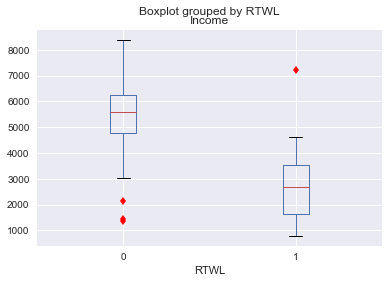

In [8]:
flierprops = dict(marker='d', markerfacecolor='red', linestyle='none')
df.boxplot('Income','RTWL',flierprops=flierprops)

One variable that may have an important effect on the relationship between is the cost of living `COL`. It also varies between right-to-work states.

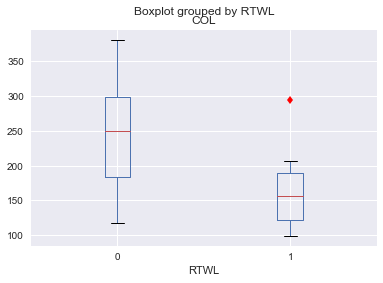

In [9]:
df.boxplot('COL','RTWL',flierprops=flierprops)

We may want to include more than one plot in a given display. For this purpose subplots should be defined first.

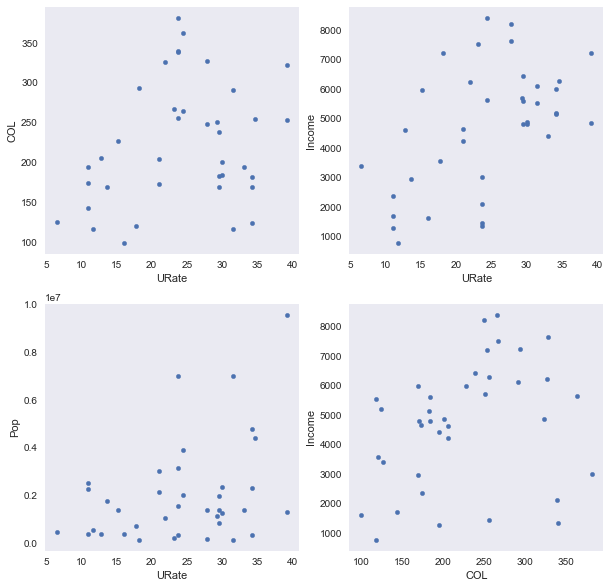

In [10]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)

df.plot.scatter('URate','COL',ax=axs[0,0])
df.plot.scatter('URate','Income',ax=axs[0,1])
df.plot.scatter('URate','Pop',ax=axs[1,0])
df.plot.scatter('COL','Income',ax=axs[1,1])

`seaborn` module has a function `pairplot` that displays pairwise relationships in a given dataset.

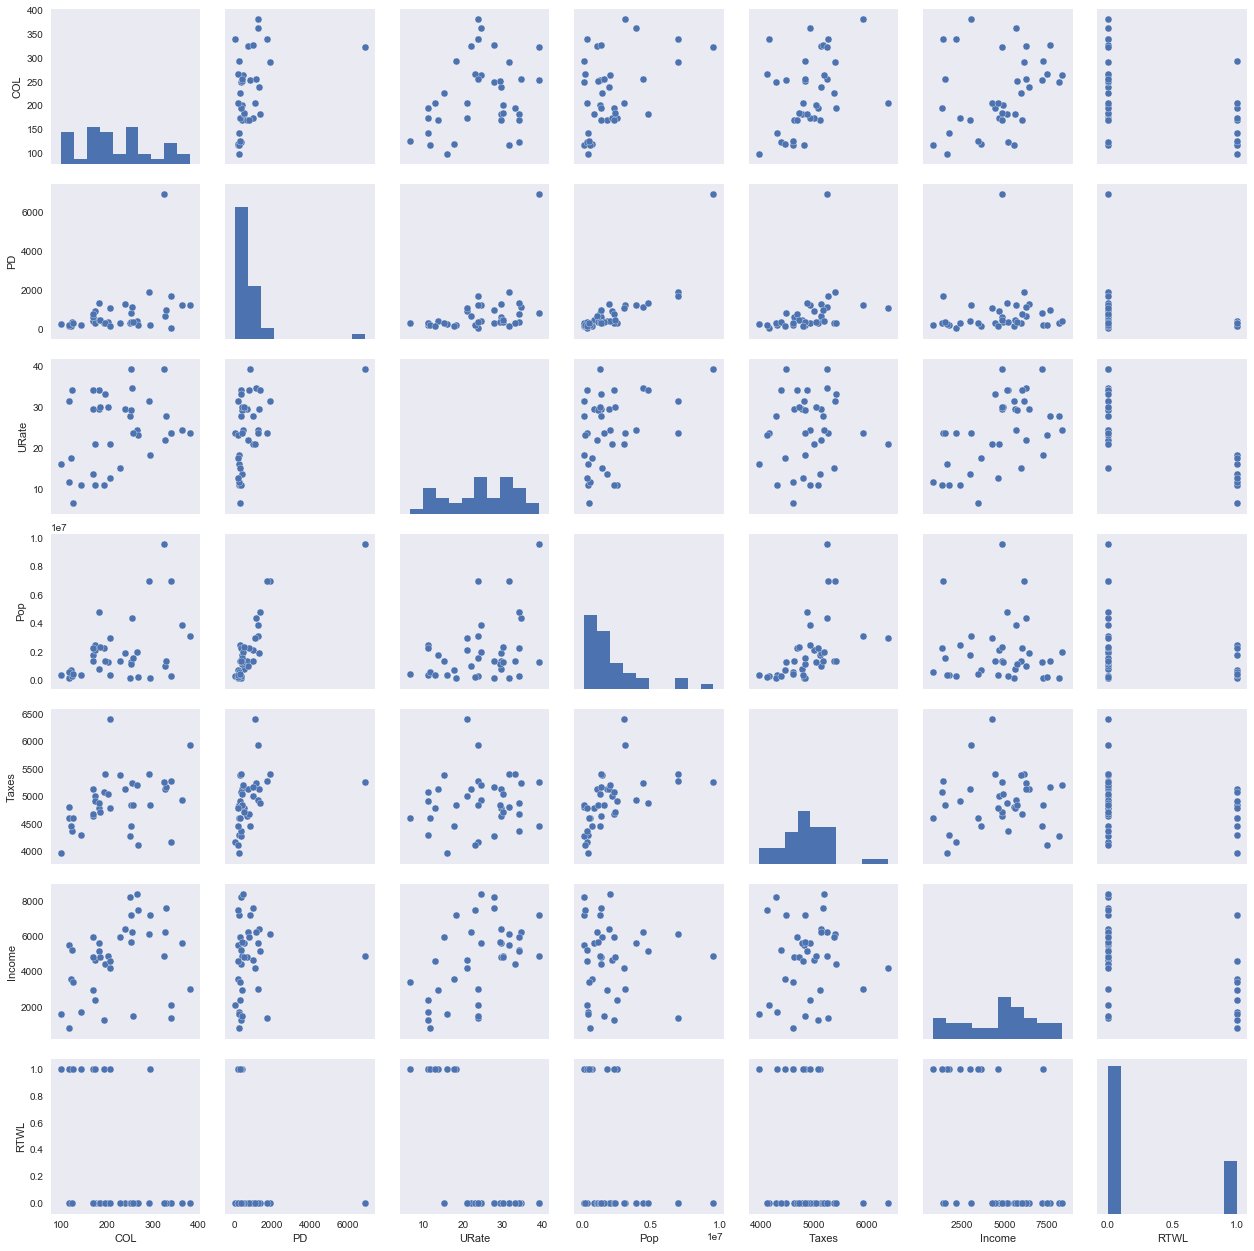

In [11]:
sns.pairplot(df)

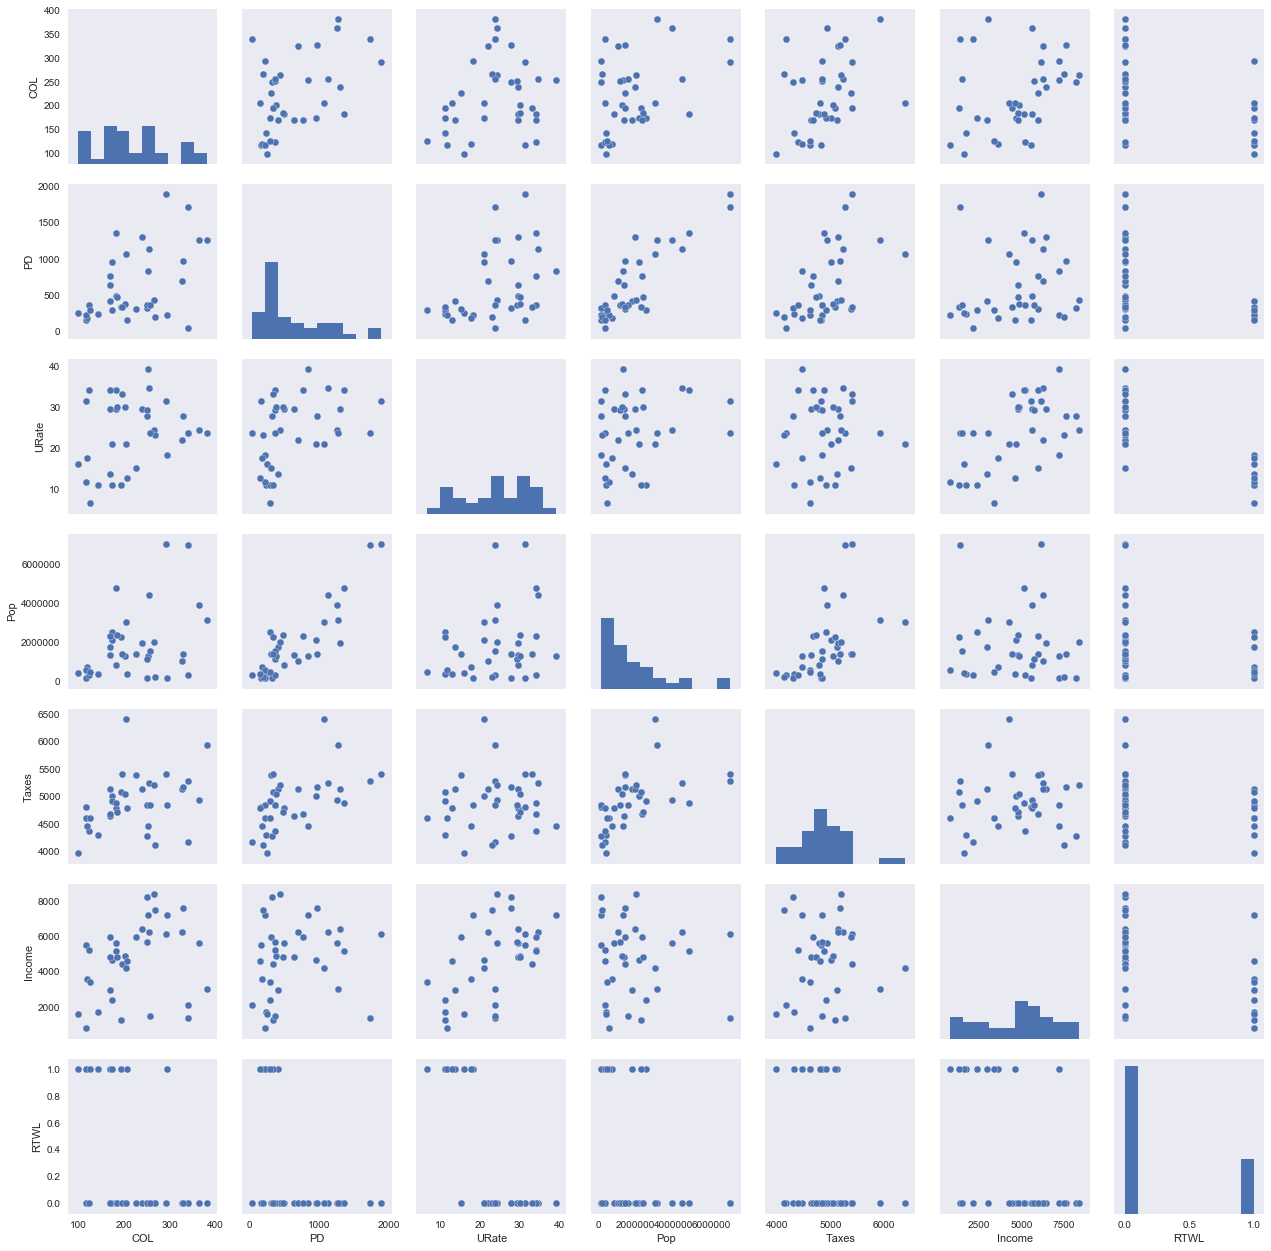

In [12]:
sns.pairplot(df[~(df.City=="New York")])

# Right-to-work example

## Building a model

Some of the main goals of this course:

* Build a statistical model describing the *effect* of `RTWL` on `Income`.

* This model should recognize that other variables also affect `Income`.

* What sort of *statistical confidence* do we have in our 
conclusion about `RTWL` and `Income`?

* Is the model adequate do describe this dataset?

* Are there other (simpler, more complicated) better models?


# Numerical descriptive statistics

## Mean of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the sample mean, $\overline{X}$ is
$$\overline{X} = \frac1n \sum_{i=1}^n X_i.$$

There are a lot of possibilities to calculate mean in Python depending on the used packages. 
`numpy` is an established package for all possible sorts of calculations. `pandas` uses `numpy`'s arrays inernally and is developed for data analysis. 

In [59]:
c=np.array([1,3,5,7,8,12,19])
s_pd=pd.Series(s_np)

print(s_np.mean())
print(s_pd.mean())

7.85714285714
7.857142857142857


## Standard deviation of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the sample standard deviation $S_X$ is

$$ S_X =\sqrt{ \frac{1}{n-1}  \sum_{i=1}^n (X_i-\overline{X})^2.} $$

In [58]:
S = np.sqrt( np.sum((s_np - s_np.mean())**2) / (s_np.size-1) )
print(S)

6.06708528121


Or using built-in `numpy` od `pandas` functions:

In [64]:
print(s_np.std(ddof=1))
print(s_pd.std())

6.06708528121
5.617029500382142


<font color="red">__Important note__ </font>

Due to univirsal definitions of `std` and `var` functions in `numpy`, different number of degrees of freedom can be set. According to the [documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html) the default value is `ddof=0`, therefore `ddof=1` must passed explicitly to divide by $n-1$. In `pandas` the default value is `ddof=1`.

The reason for a normalization by $n-1$ is a consequence of the fact that we want to asses the standard deviation of the population mean based on the given sample. For more details and explanations any statistical book  can be reffered to.

## Median of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the sample median is the `middle` of the sample:
if $n$ is even, it is the average of the middle two points.
If $n$ is odd, it is the midpoint.

In [69]:
print( np.median(s_np) )
print( s_pd.median()   )

7.0
7.0


## Quantiles of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the  $q$-th quantile is a point $x_q$ in the data such that $q \cdot 100\%$ of the data are smaller than $x_q$.

### Example

The $0.5$-quantile is the median: half 
of the data lie to the right of the median

In [72]:
print( np.percentile(s_np, [25,50,75]) )
print()
print( s_pd.quantile([0.25,0.5,0.75])  )

[  4.   7.  10.]

0.25     4.0
0.50     7.0
0.75    10.0
dtype: float64


# Graphical statistical summaries

Let's load another dataset on [calcium suplementation](http://lib.stat.cmu.edu/DASL/Datafiles/Calcium.html) was downloaded and saved in the `03_calcium.txt` file in the data folder accompanying this note book.

In [17]:
fpath=os.path.join(os.getcwd(), 'data', '01_calcium.txt')
calcium=pd.read_table(fpath)

We've already seen a boxplot. Another common statistical summary is a histogram.

Using `pandas`:

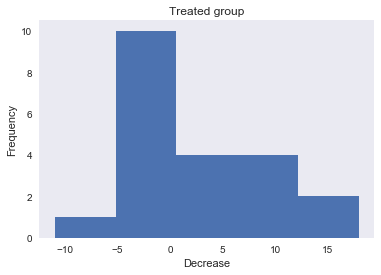

In [18]:
ax=calcium.Decrease.plot.hist(5)
ax.set_xlabel('Decrease')
ax.set_title('Treated group')

or using `seaborn`:

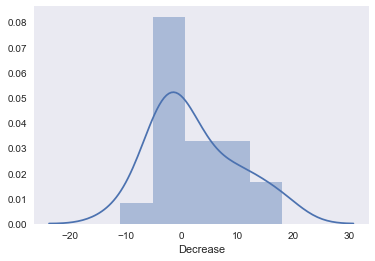

In [19]:
sns.distplot(calcium.Decrease,kde=True)

As a side note, both `pandss.plot` and `seaborn` are based on `matplotlib` library. Therefore, they have similar syntax, which makes them complementary to each other.

# Inference about a population mean

## A testing scenario

* Suppose we want to determine the efficacy of a new drug on blood pressure.

* Our study design is: we will treat
a large patient population (maybe not so large: budget constraints limit it $n=20$) with the drug and measure their
blood pressure before and after taking the drug.

* One way to conclude that the drug is effective if the blood pressure has decreased. That is,
if the average difference between before and after is positive.


## Setting up the test



* The *null hypothesis*, <font color="red">$H_0$</font> is: <font color="red">*the average difference is less
than zero.*</font>

* The *alternative hypothesis*, <font color="green">$H_a$</font>, is: <font color="green">*the average difference 
is greater than zero.*</font>

* Sometimes (actually, often), people will test the alternative, <font color="green">$H_a$</font>: *the
average difference is not zero* vs. <font color="red">$H_0$</font>: *the average difference is zero.*

* The test is performed by estimating
the average difference and converting to standardized units.


## Drawing from a box

* Formally, could set up the above test as drawing from a box of *differences
in blood pressure*.

* A box model is a useful theoretical device that describes the experiment
under consideration. In our example, we can think of the sample of decreases
drawn 20 patients at random from a large population (box) containing all the possible
decreases in blood pressure.

## A simulated box model

* In our box model, we will assume that the decrease is an integer drawn at random on the interval from -3 to 6.
* We will draw $n=20$ random integers from -3 to 6 with replacement and test whether the mean of our "box" is 0 or not.

In [20]:
n=20
mysample=np.random.choice(np.arange(-3,7),n)
print(mysample)

[ 1  0  0  0  6 -1 -1  4 -3  4 -2 -3 -1  3  1  1 -2 -1 -1 -3]


The test is usually a $T$ test that has the form

$$ T = \frac{\overline{X}-0}{S_X/\sqrt{n}} $$
    
The formula can be read in three parts:

- estimating the mean: $\overline{X}$;

- comparing to 0: subtracting 0 in the numerator;

- converting difference to standardized units: dividing by $S_X/\sqrt{n}$

In [75]:
T=(mysample.mean()-0)/(mysample.std(ddof=1)/np.sqrt(n))
print(T)

0.178099782578


The same using `scipy`:

In [74]:
Tsp=sp.stats.ttest_1samp(mysample,0,)
print(Tsp.statistic)

0.178099782578


The test statistic $T$ is then compared to an appropriate value (double-sided $df=19$ degrees of freedom) of T distribution with a significance level $\alpha=5\%$: